# Henrietta & the stars

Você vê uma estrela com brilho fraco à noite, ela está distante da Terra ou é uma estrela pequena? Resposta: depende do quanto que demora a oscilação do brilho da estrela - o tempo que ela demora para pulsar mais forte, e depois, mais fraco. 

Se o pulsar de uma estrela demora mais de 3 meses, fique certo de que é uma estrela muito grande. Ela só é vista com um brilho fraco e pequeno por nós porque ela está distante da Terra. 
Essa ideia existe graças a uma brilhante análise de dados feita por uma astrônoma: Henrietta Swan Leavitt. No início do séc. XX, ela criou um gráfico que relacionava a luminosidade das estrelas com o período de brilho delas, e isso foi crucial para expandir os limites da nossa compreensão sobre os cosmos.

# Carregar os módulos de interesse

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(pd)
print(np)
print(plt)
print(sns)

<module 'pandas' from '/home/chico_linux/.local/lib/python3.10/site-packages/pandas/__init__.py'>
<module 'numpy' from '/home/chico_linux/.local/lib/python3.10/site-packages/numpy/__init__.py'>
<module 'matplotlib.pyplot' from '/home/chico_linux/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>
<module 'seaborn' from '/home/chico_linux/.local/lib/python3.10/site-packages/seaborn/__init__.py'>


# Carregar os dados

Os dados terão que ser escritos manualmente, pois eles estão documentados numa fonte muito antiga, datada do início do século XX (1912). 

A fonte dos dados é [esse artigo](https://adsabs.harvard.edu/full/1912HarCi.173....1L), sob a autoria de Edward Charles Pickering e Henrietta Swan Leavitt (hoje, sabemos que ela foi a principal contribuinte desse _paper_): 

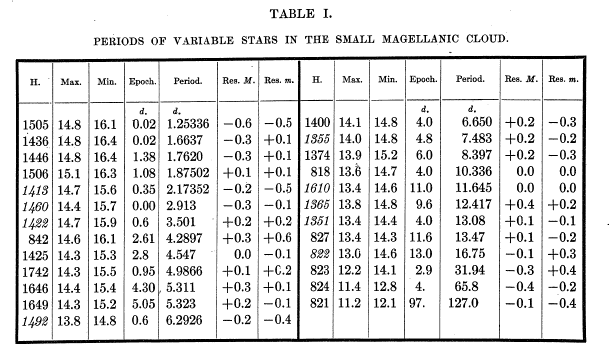

A citada _Small Magellanic Cloud_ (a Pequena Nuvem de Magalhães) é essa [aqui](https://en.wikipedia.org/wiki/Small_Magellanic_Cloud), a qual envolve, pleo menos, duas constelações, a Tucana e Hydrus. 

Vamos inserir nessa tabela a informação de coordenadas, ou seja, o RA (Right Ascention) e o Dec (Declination), no qual vamos extrair desse artigo [aqui](https://articles.adsabs.harvard.edu//full/1908AnHar..60...87L/0000100.000.html), que lista 1777 variáveis (estrelas) da Pequena Nuvem de Magalhães. 

> "_The fourth and fifth columns give the coordinates in x and y, as measured from the south-preceding corner of the plate. The approximate centre of the plate has the coordinates, x=12752“, y=10393“, and its position is in R.A.=0h50m.9, Dec.=-73º7' (1900). Owing to the great distance of the region from the equator, the order of the coordinates in x frequently differs from that os right ascension_". 

In [88]:
Harvard = ["1505", "1436", "1446", "1506", "1413", 
           "1460", "1422", "842", "1425", "1742", 
           "1646", "1649", "1492", "1400", "1355", 
           "1374", "818", "1610", "1365", "1351", 
           "827", "822", "823", "824", "821"]

MaxBright = [14.8, 14.8, 14.8, 15.1, 14.7, 14.4, 14.7, 14.6, 14.3, 14.3, 14.4, 14.3, 13.8, 14.1, 14.0, 13.9, 13.6, 13.4, 13.8, 13.4, 13.4, 13.0, 12.2, 11.4, 11.2]

MinBright = [16.1, 16.4, 16.4, 16.3, 15.6, 15.7, 15.9, 16.1, 15.3, 15.5, 15.4, 15.2, 14.8, 14.8, 14.8, 15.2, 14.7, 14.6, 14.8, 14.4, 14.3, 14.6, 14.1, 12.8, 12.1]

Interval = [1.25336, 1.6637, 1.7620, 1.87502, 2.17352, 2.913, 3.501, 4.2897, 4.547, 4.9866, 5.311, 5.323, 6.2926, 6.650, 7.483, 8.397, 10.336, 11.645, 12.417, 13.08, 13.47, 16.75, 31.94, 65.8, 127.0]

x = [11781, 11031, 11146, 11784, 10546, 11311, 10663, 13863, 10697, 13640, 13012, 13021, 11666, 10304, 9406, 9884, 9220, 12767, 9594, 9358, 11473, 9581, 10077, 10734, 9570]  

y = [12212, 10889, 10941, 11355, 6744, 12362, 6353, 10884, 10476, 10519, 10047, 9944, 10803, 10786, 7445, 6726, 6297, 11006, 6124, 6836, 10674, 6805, 6567, 9857, 6141]

stars = pd.DataFrame(data={"harvard": Harvard,
                     "max_bright": MaxBright,
                     "min_bright": MinBright,
                     "interval": Interval,
                     "x": x, 
                     "y": y})

Usar as informações para converter as coordenadas `x` e `y`, mensuradas em arquesegundos, em RA e Dec (em graus). 

Lembre-se que o centro da placa que fotografou as estrelas da época possui as seguintes coordenadas:

* __x__: 12752 arcseconds (0h 50m 9s)
* __y__: 10393 arcseconds (73º 7')

In [116]:
center_dec = -(73 + 7/60 + 0/3600) # Converta em graus

center_ra = 0 + 50/60 + 9/3600 # Converta em horas
center_ra = center_ra*15 # Converta em graus - cada 1 hora é equivalente a 15º 

center_x = 12752 # Em arquesegundos
center_y = 10393 # Em arquesegundos

In [117]:
stars["ra"] = (stars["x"] - center_x)/3600 # Converte os arquesegundos em graus
stars["ra"] = stars["ra"] + center_ra

stars["dec"] = (stars["y"] - center_y)/3600 # Converte os arquesegundos em graus
stars["dec"] = stars["dec"] + center_dec

stars

,harvard,max_bright,min_bright,interval,x,y,ra,dec
0,1505,14.8,16.1,1.25336,11781,12212,12.267778,-72.611389
1,1436,14.8,16.4,1.66370,11031,10889,12.059444,-72.978889
2,1446,14.8,16.4,1.76200,11146,10941,12.091389,-72.964444
3,1506,15.1,16.3,1.87502,11784,11355,12.268611,-72.849444
4,1413,14.7,15.6,2.17352,10546,6744,11.924722,-74.130278
5,1460,14.4,15.7,2.91300,11311,12362,12.137222,-72.569722
6,1422,14.7,15.9,3.50100,10663,6353,11.957222,-74.238889
7,842,14.6,16.1,4.28970,13863,10884,12.846111,-72.980278
8,1425,14.3,15.3,4.54700,10697,10476,11.966667,-73.093611
9,1742,14.3,15.5,4.98660,13640,10519,12.784167,-73.081667


# Reproduza a análise da Henrietta Swan

Aquela mostra a alta correlação entre brilho e intervalor de pulsar da estrela. 

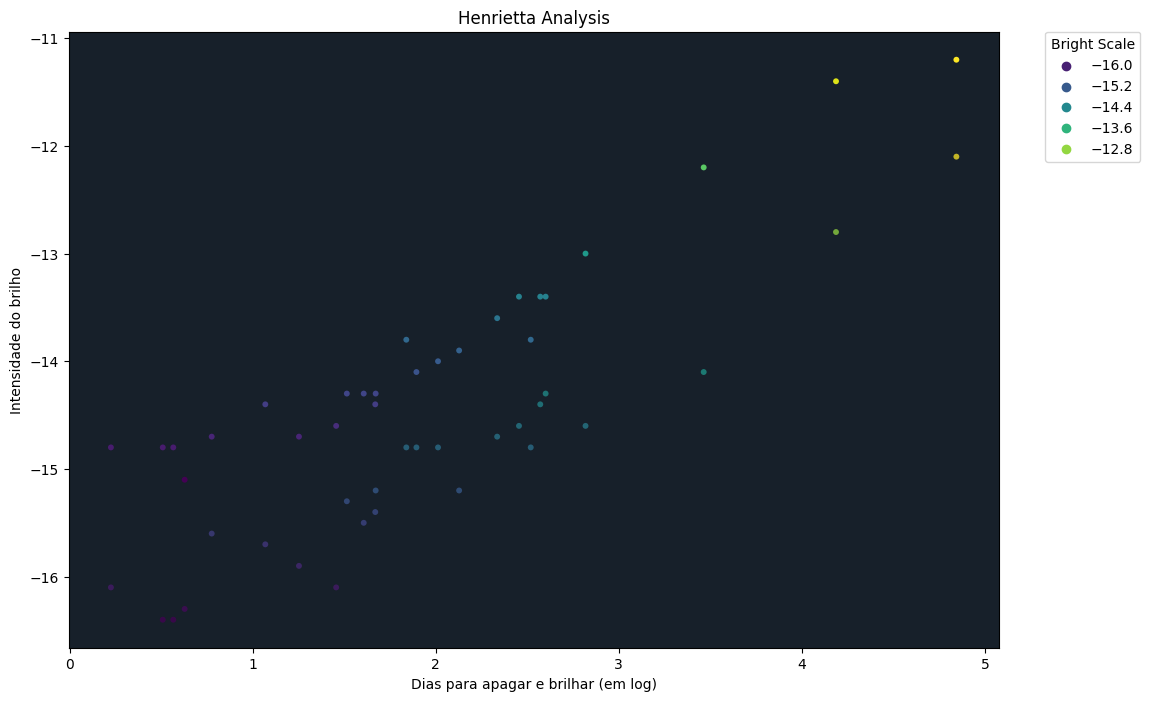

In [125]:
sns.set_style(rc = {"axes.facecolor": "#17202A"})

fig, ax = plt.subplots(figsize=(12, 8))

fig = sns.scatterplot(x=np.log(stars.interval),
            y=-stars.min_bright, 
            alpha=0.75,
            linewidth=0,
            size=10,
            hue=-stars.min_bright,
            palette="viridis", 
            data=stars
            )

sns.scatterplot(x=np.log(stars.interval),
            y=-stars.max_bright, 
            hue=-stars.max_bright,
            size=20,
            alpha=1.0,
            linewidth=0,
            palette="viridis", 
            data=stars
            )

ax.set_title("Henrietta Analysis")
ax.set_xlabel("Dias para apagar e brilhar (em log)")
ax.set_ylabel("Intensidade do brilho")

h,l = fig.get_legend_handles_labels()
plt.legend(h[0:5],l[0:5],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., facecolor="white", title="Bright Scale")